<a href="https://colab.research.google.com/github/wongmeicing/Carbon-footprint_V2/blob/main/NATimeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

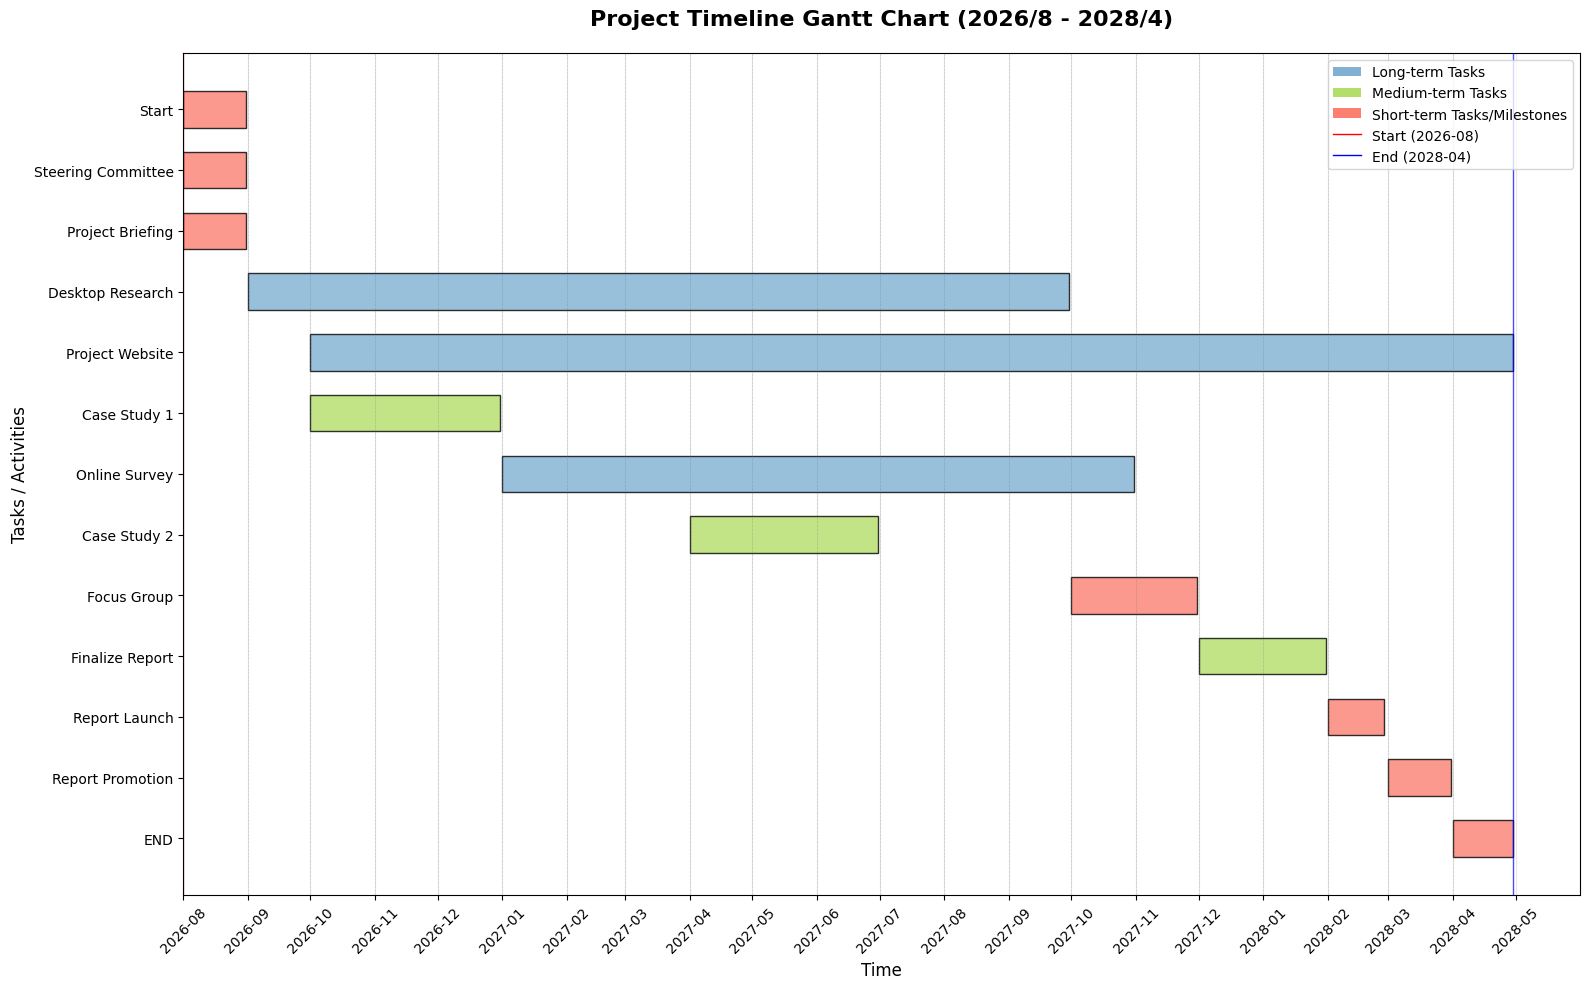


Task Schedule Details:


,task,start,end,type
0,Start,2026-08-01,2026-08-31,short
1,Steering Committee,2026-08-01,2026-08-31,short
2,Project Briefing,2026-08-01,2026-08-31,short
3,Desktop Research,2026-09-01,2027-09-30,long
4,Project Website,2026-10-01,2028-04-30,long
5,Case Study 1,2026-10-01,2026-12-31,medium
6,Online Survey,2027-01-01,2027-10-31,long
7,Case Study 2,2027-04-01,2027-06-30,medium
8,Focus Group,2027-10-01,2027-11-30,short
9,Finalize Report,2027-12-01,2028-01-31,medium


In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import pandas as pd

# 使用英文标签避免中文显示问题
tasks = [
    {'task': 'Start', 'start': '2026-08-01', 'end': '2026-08-31', 'type': 'short'},
    {'task': 'Steering Committee', 'start': '2026-08-01', 'end': '2026-08-31', 'type': 'short'},
    {'task': 'Project Briefing', 'start': '2026-08-01', 'end': '2026-08-31', 'type': 'short'},
    {'task': 'Desktop Research', 'start': '2026-09-01', 'end': '2027-09-30', 'type': 'long'},
    {'task': 'Project Website', 'start': '2026-10-01', 'end': '2028-04-30', 'type': 'long'},
    {'task': 'Case Study 1', 'start': '2026-10-01', 'end': '2026-12-31', 'type': 'medium'},
    {'task': 'Online Survey', 'start': '2027-01-01', 'end': '2027-10-31', 'type': 'long'},
    {'task': 'Case Study 2', 'start': '2027-04-01', 'end': '2027-06-30', 'type': 'medium'},
    {'task': 'Focus Group', 'start': '2027-10-01', 'end': '2027-11-30', 'type': 'short'},
    {'task': 'Finalize Report', 'start': '2027-12-01', 'end': '2028-01-31', 'type': 'medium'},
    {'task': 'Report Launch', 'start': '2028-02-01', 'end': '2028-02-28', 'type': 'short'},
    {'task': 'Report Promotion', 'start': '2028-03-01', 'end': '2028-03-31', 'type': 'short'},
    {'task': 'END', 'start': '2028-04-01', 'end': '2028-04-30', 'type': 'short'}
]

# 转换为DataFrame
df = pd.DataFrame(tasks)

# 转换日期格式
df['start_date'] = pd.to_datetime(df['start'])
df['end_date'] = pd.to_datetime(df['end'])
df['duration'] = (df['end_date'] - df['start_date']).dt.days

# 创建颜色映射
color_map = {
    'long': '#80b1d3',    # 长期任务 - 蓝色
    'medium': '#b3de69',  # 中期任务 - 绿色
    'short': '#fb8072'    # 短期任务 - 红色
}

# 创建图形
fig, ax = plt.subplots(figsize=(16, 10))

# 获取所有唯一的月份
start_date = pd.to_datetime('2026-08-01')
end_date = pd.to_datetime('2028-04-30')
all_months = pd.date_range(start=start_date, end=end_date, freq='MS')

# 绘制月份分隔线
for month in all_months:
    ax.axvline(x=month, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)

# 特别标记起始和结束月份
ax.axvline(x=start_date, color='red', linestyle='-', alpha=0.7, linewidth=1, label='Start')
ax.axvline(x=end_date, color='blue', linestyle='-', alpha=0.7, linewidth=1, label='End')

# 绘制甘特图
y_pos = range(len(df))
for i, (idx, row) in enumerate(df.iterrows()):
    start_date = row['start_date']
    duration = row['duration']
    color = color_map[row['type']]

    ax.barh(y=i, width=duration, left=start_date,
            color=color, edgecolor='black', alpha=0.8, height=0.6)

# 设置y轴标签
ax.set_yticks(y_pos)
ax.set_yticklabels(df['task'])
ax.invert_yaxis()  # 反转y轴使任务从上到下显示

# 设置x轴日期格式
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

# 设置标题和标签
plt.title('Project Timeline Gantt Chart (2026/8 - 2028/4)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Tasks / Activities', fontsize=12)

# 添加网格
ax.grid(True, axis='x', alpha=0.3)
ax.set_axisbelow(True)

# 添加图例
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#80b1d3', label='Long-term Tasks'),
    Patch(facecolor='#b3de69', label='Medium-term Tasks'),
    Patch(facecolor='#fb8072', label='Short-term Tasks/Milestones'),
    plt.Line2D([0], [0], color='red', linewidth=1, label='Start (2026-08)'),
    plt.Line2D([0], [0], color='blue', linewidth=1, label='End (2028-04)')
]
ax.legend(handles=legend_elements, loc='upper right')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

# 显示数据表格
print("\nTask Schedule Details:")
display(df[['task', 'start', 'end', 'type']])